In [3]:
#Import inputs
with open('sents.txt', encoding='utf-8', mode='r') as f:
 reviews = f.read()
with open('sentiments.txt', encoding='utf-8', mode='r') as f:
 labels = f.read()
print(reviews[:50])
print()
print(labels[:26])

slide giáo trình đầy đủ .
nhiệt tình giảng dạy , g

2
2
0
0
2
2
1
0
0
0
2
0
1



In [2]:
#Data processing

#1. Lowercase
reviews = reviews.lower()

#2. Punctuation removal and remove abnormal reviews
from string import punctuation

all_text = "".join([c for c in reviews if (c not in punctuation)])

reviews_split = all_text.split("\n")
weird_r = [r for r in reviews_split if r in {"", " ", "\n", "\t"}]

reviews_split = [review for review in reviews_split if review not in weird_r]

print(len(weird_r))
print(len(reviews_split))

#3. Label processing

#Process raw data
labels = [label for label in labels if (label != '') and (label != "\n")]
labels = [int(l)-1 for l in labels]

1
11426


In [33]:
#Tokenize

#1. Split to words
from collections import Counter
from underthesea import word_tokenize
import sklearn.feature_extraction.text.TfidfVectorizer
 
all_text2 = ' '.join(reviews_split)

words = word_tokenize(all_text2)

#Count numbers of words
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

print(sorted_words[:20])

#2. Create vocabs
vocab_to_int = {w:i+1 for i, (w, c) in enumerate(sorted_words)}


#3. Word-to-int
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in word_tokenize(review)]
    reviews_int.append(r)
print(reviews_int[0:3])
print(len(reviews_int))
print(len(labels))


[('thầy', 2989), ('sinh viên', 2682), ('dạy', 2161), ('và', 2068), ('không', 2060), ('rất', 1961), ('nhiệt tình', 1825), ('cho', 1722), ('có', 1709), ('hiểu', 1626), ('nhiều', 1621), ('giảng viên', 1610), ('dễ', 1264), ('học', 1221), ('bài', 1142), ('cô', 1141), ('nên', 1073), ('được', 1024), ('hơn', 1014), ('với', 973)]


KeyError: 'tiếp thu nhiệt tình'

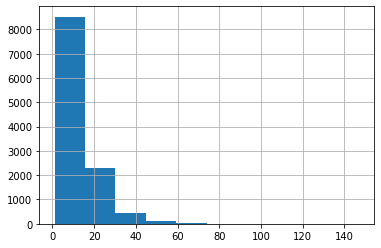

count    11426.000000
mean        12.678803
std          9.548335
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        147.000000
dtype: float64

In [10]:
#Analyzing data

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [11]:
#Eliminate too short or too long reviews
reviews_int = [reviews_int[i] for i, l in enumerate(reviews_len) if (l > 0)]
labels = [labels[i] for i, l in enumerate(reviews_len) if (l > 0)]

In [20]:
import numpy as np
def pad_features(reviews_int, seq_length):
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length - review_len))
            new = zeroes + review
        elif review_len > seq_length:
            new = review[0:seq_length]
        features[i,:] = np.array(new)
    return features

seq_length = 50
features = pad_features(reviews_int, seq_length)

print(features[:10, :])


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  119   45   51  122   90]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   13
     8    2    3  180  275   24    5    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    99    6  122   90 1518   97  211   36]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0   47  212   69  139  448  140  279   10   35
   127 

In [22]:
#Generate DataLoaders and Batchings
    
import torch
from torch.utils.data import DataLoader, TensorDataset

train_y = np.array(train_y)
train_x = np.array(train_x)
valid_y = np.array(valid_y)
valid_x = np.array(valid_x)
test_y = np.array(test_y)
test_x = np.array(test_y)

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

batch_size = 50

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

AssertionError: Size mismatch between tensors

In [23]:
#Define networks 

import torch.nn as nn
import torch.cuda as cuda

class SentimentLSTM(nn.Module):
    
    def __init__ (self, vocab_size, output_size, embedded_dim, hidden_dim, n_layers, drop_prob = 0.5):
        super().__init__()
        
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout = drop_prob, batch_first = True)
        
        self.dropout = nn.Dropout(0.3)
        
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        sig_out = self.sig(out)
        
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        if (cuda.is_available()):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

In [24]:
#Initialization

vocab_size = len(vocab_to_int) + 1
output_size = 1
embedding_dim = 40
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)


SentimentLSTM(
  (embedding): Embedding(2486, 40)
  (lstm): LSTM(40, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [26]:
import torch.cuda as cuda
import torch

lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 

counter = 0
print_every = 100
clip=5 # gradient clipping

train_on_gpu = cuda.is_available()

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

RuntimeError: Expected hidden[0] size (2, 43, 256), got [2, 50, 256]

In [ ]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))